## RESULTADOS ESPERADOS DE LA EXPERIENCIA

### ITEM A

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

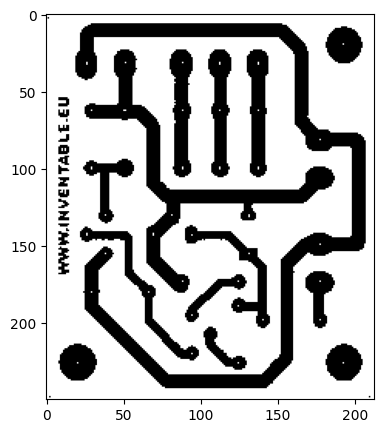

In [6]:
#Realizamos la lectura de la imagen, y representamos la imagen en arrays usando np.uint8
img = cv2.imread("pistas.jpg",0)
img = np.uint8(img > 128)
#Graficamos la imagen en escala de grises
plt.subplots(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.show()

In [7]:
#Realizamos los filtros morfológicos
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
selem2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
selem3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4))

img_dil = cv2.dilate(img, selem2, iterations = 1)
img_ero = cv2.erode(img, selem2, iterations = 1)
img_ope = cv2.morphologyEx(img, cv2.MORPH_OPEN, selem2)
img_clo = cv2.morphologyEx(img, cv2.MORPH_CLOSE, selem2)

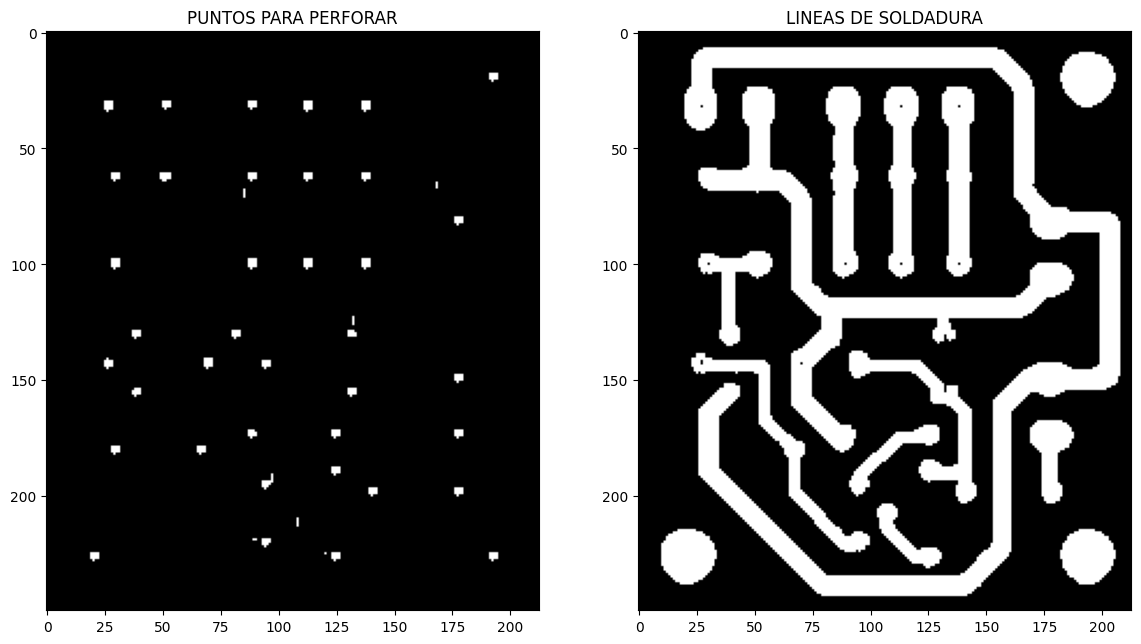

In [8]:
#Definimos los puntos a perfeorar
tophat = cv2.morphologyEx(img_dil, cv2.MORPH_TOPHAT, selem1)
soldadura = 1 - img_clo
fig,axes=plt.subplots(2,2,figsize=(14,8))
plt.subplot(121)
plt.imshow(tophat, cmap="gray")
plt.title("PUNTOS PARA PERFORAR")
plt.subplot(122)
plt.imshow(soldadura, cmap="gray")
plt.title("LINEAS DE SOLDADURA")
plt.show()

### ITEM B

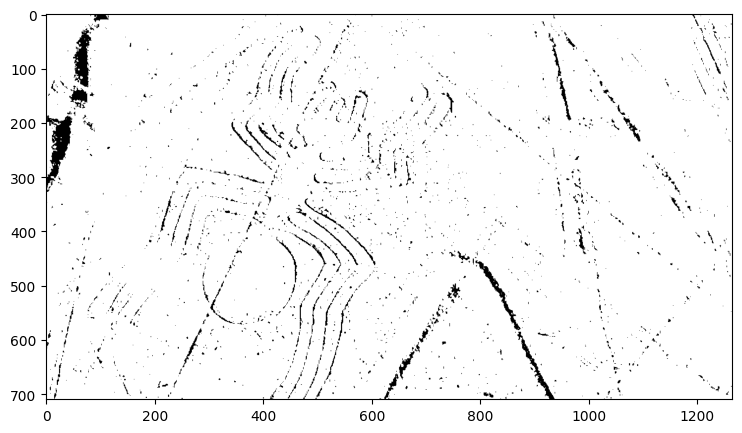

In [9]:
#Leemos la imagen de Lineas de Nazca y representamos la imagen en arrays usando np.uint8
img_b = cv2.imread("lineas.jpg",0)
img_b = np.uint8(img_b>62)
#Mostramos la imagen en escala de grises
plt.subplots(figsize = (10,5))
plt.imshow(img_b, cmap="gray")
plt.show()

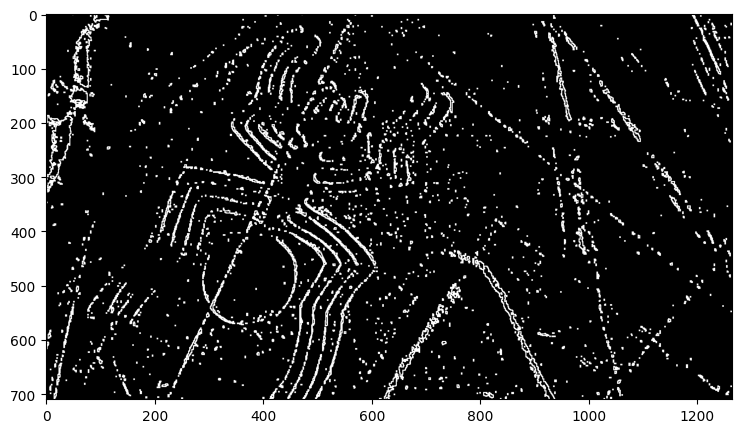

In [10]:
#Primer detector de bordes
selem1 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
gradient = cv2.morphologyEx(img_b, cv2.MORPH_GRADIENT, selem1)

plt.subplots(figsize = (10,5))
plt.imshow(gradient, cmap="gray")
plt.show()

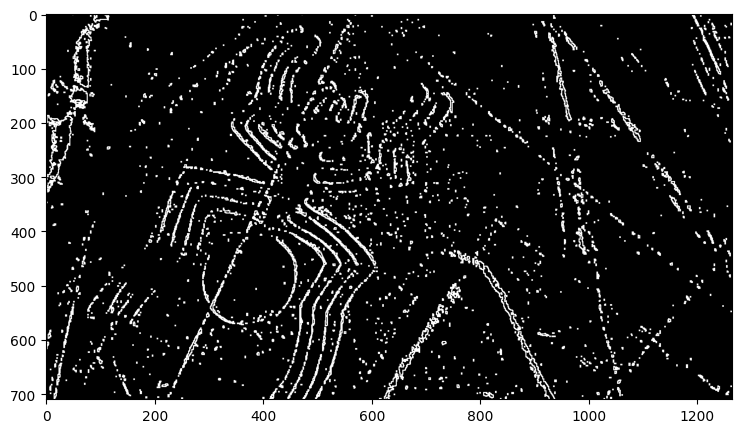

In [11]:
#Segundo detector de bordes
bordesCanny = cv2.Canny(img_b, 10, 20)
plt.subplots(figsize = (10,5))
plt.imshow(gradient, cmap="gray")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

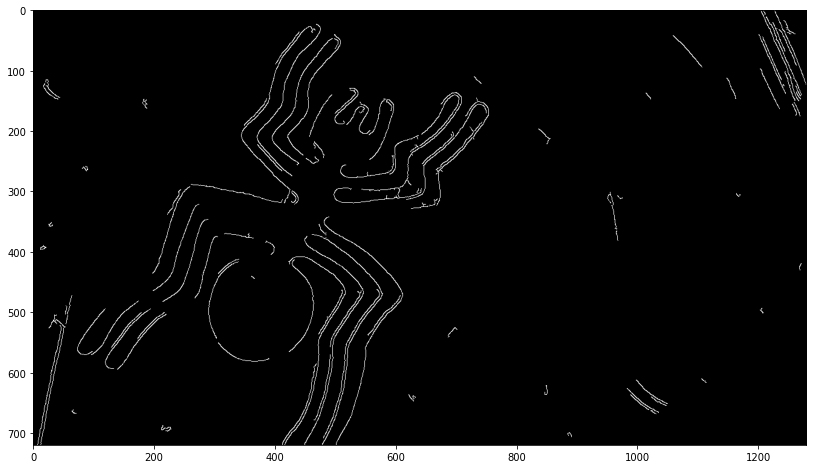

In [337]:
##Tercer detector de bordes (y el mejor)
img = cv2.imread("lineas.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 150, 350, apertureSize = 3)
plt.subplots(figsize=(14,8))
plt.imshow(edges, cmap="gray", vmin = 0, vmax = 255)
plt.show

### ITEM C

<function matplotlib.pyplot.show(close=None, block=None)>

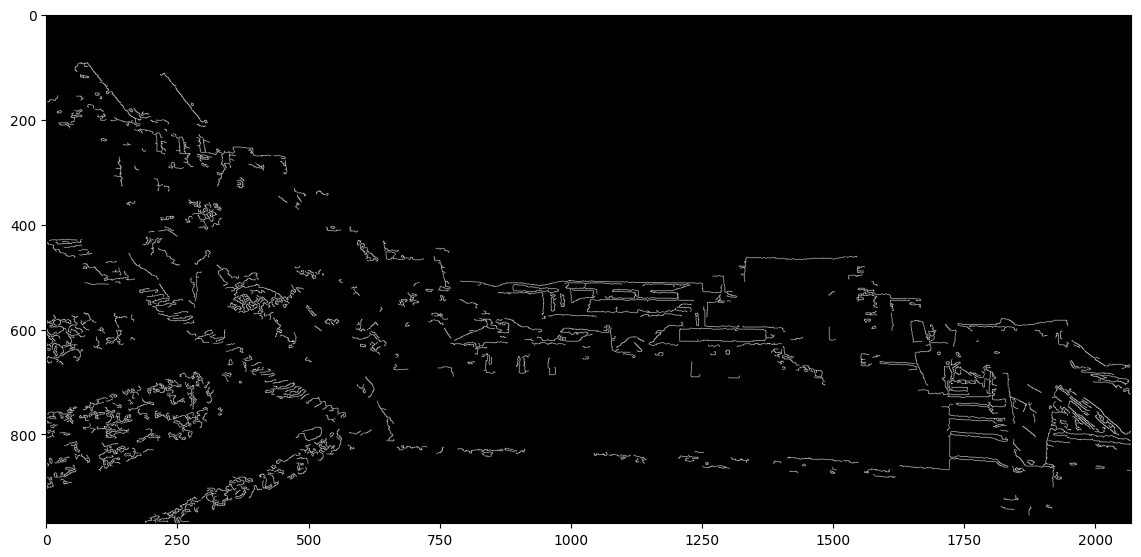

In [23]:
img = cv2.imread('Machu-picchu.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 150, 350, apertureSize = 3)
plt.subplots(figsize=(14,8))
plt.imshow(edges, cmap="gray", vmin = 0, vmax = 255)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

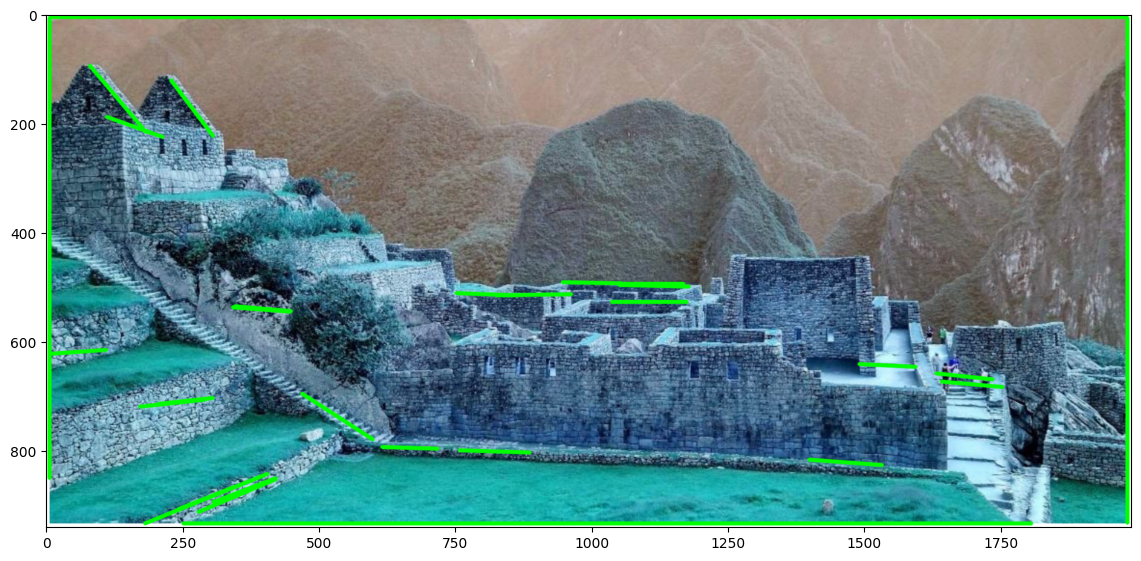

In [24]:
img = cv2.imread('Machu-picchu.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 150, 230, apertureSize = 3)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=14)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 5, cv2.LINE_AA)

plt.subplots(figsize=(14,8))
plt.imshow(img, cmap="gray", vmin = 0, vmax = 255)
plt.show